In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [4]:
def relu(X):
  a = torch.zeros_like(X)
  
  return torch.max(X, a)

In [5]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

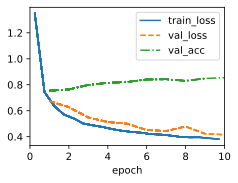

In [12]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [13]:
class MLP(d2l.Classifier):
  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
      nn.Flatten(),
      nn.LazyLinear(num_hiddens),
      nn.ReLU(),
      nn.LazyLinear(num_outputs)
    )

### Exercises

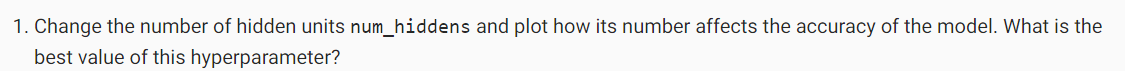

In [ ]:
for num_hiddens in [4, 8, 32, 64, 128, 256, 512, 1024]:
  model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
  data = d2l.FashionMNIST(batch_size=256)
  trainer = d2l.Trainer(max_epochs=10)
  trainer.fit(model, data)

KeyboardInterrupt: 

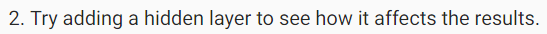

In [17]:
class MLP(d2l.Classifier):
  def __init__(self, num_outputs, num_hiddens, lr):
    super().__init__()
    self.save_hyperparameters()
    
    layers = []
    layers.append(nn.Flatten())
    
    for i in range(len(num_hiddens)):
      layers.append(nn.LazyLinear(out_features=num_hiddens[i]))
      layers.append(nn.ReLU())
      
    layers.append(nn.LazyLinear(num_outputs))
    
    self.net = nn.Sequential(*layers)

In [18]:
model = MLP(num_outputs=10, num_hiddens=[256, 512, 256], lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

KeyboardInterrupt: 

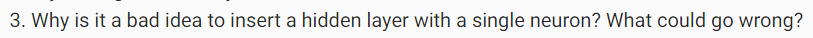

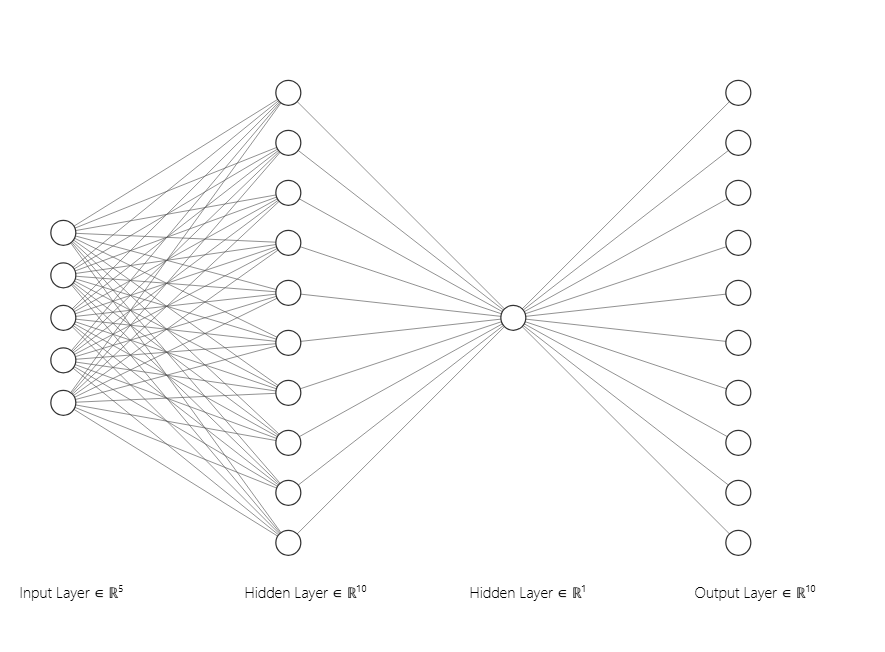

Suppose that we have this structure, with a hidden layer of 1 hidden unit. Why this is a bas idea? On my opinion, there are two main reasons:

1. We decrease the whole power of neural network adding those layer. We could expand our features, try more hidden units, where each unit can learn something different, and we lose all of this studies in a single neuron. Better will be just delete those neuron and let the output unit be the sum of contributions of hidden layer with 10 neurons.
2. There is no guarantee that those neuron will be not just zero, because of this whole output layer, and all other layers that goes after those single neuron - will be zero to 

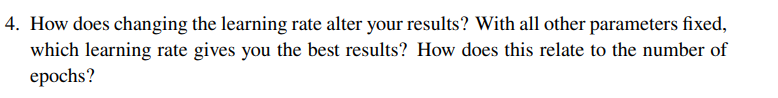

In [ ]:
for num_hiddens in [0.0001, 0.001, 0.01, 0.1, 0.5]:
  model = MLP(num_outputs=10, num_hiddens=num_hiddens, lr=0.1)
  data = d2l.FashionMNIST(batch_size=256)
  trainer = d2l.Trainer(max_epochs=10)
  trainer.fit(model, data)

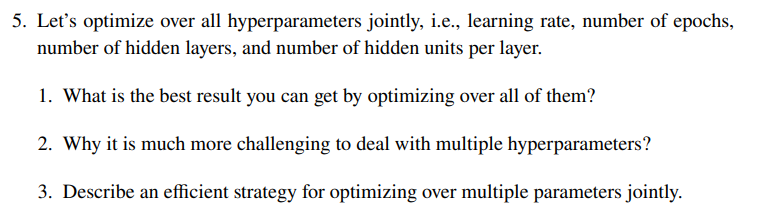